# Análise estatística

-----------------------------

In [1]:
## IMPORTS
%matplotlib inline

import easygui
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import scipy.stats as st
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore') 

---------------------------

In [2]:
## Load dataset

dataframe = pd.read_csv("abalone_with_distnormal_columns.csv")

In [3]:
dataframe.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,generate column 1,generate column 2,generate column 3,generate column 4
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,-0.96,0.91,-0.36,-0.03
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0.39,-0.24,-1.21,-0.60
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0.38,-0.72,-1.75,-0.31
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0.65,0.21,0.02,1.69
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1.07,2.12,0.25,-1.61


Gerar dataset com colunas seguindo distribuição normal...<br>
ferramenta: https://www.socscistatistics.com/utilities/normaldistribution/default.aspx

In [4]:
dataframe.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,generate column 1,generate column 2,generate column 3,generate column 4
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,0.011573,0.013495,-0.023591,0.002334
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,1.007581,1.000966,0.998935,0.998763
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,-4.070000,-4.230000,-3.090000,-3.240000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,-0.690000,-0.660000,-0.680000,-0.670000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,0.020000,0.000000,-0.010000,-0.010000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,0.700000,0.690000,0.640000,0.680000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,3.540000,3.350000,3.840000,3.700000


In [5]:
freq = []
for col in dataframe.columns:
    if dataframe[col].dtypes == 'object':
        freq.append("Elementos mais frequentes da coluna {}: {}".format(col,dataframe[col].unique()))

In [6]:
freq

["Elementos mais frequentes da coluna Sex: ['M' 'F' 'I']"]

In [7]:
dataframe.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,generate column 1,generate column 2,generate column 3,generate column 4
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,-0.96,0.91,-0.36,-0.03
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0.39,-0.24,-1.21,-0.60
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0.38,-0.72,-1.75,-0.31
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0.65,0.21,0.02,1.69
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1.07,2.12,0.25,-1.61
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,-0.58,-0.43,-0.58,-1.08
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20,-1.26,1.44,0.72,-0.30
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16,0.21,0.32,0.73,-1.13
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9,-0.89,-0.89,-1.08,-1.76
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19,1.56,-0.53,0.70,-0.89


In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sex                4177 non-null   object 
 1   Length             4177 non-null   float64
 2   Diameter           4177 non-null   float64
 3   Height             4177 non-null   float64
 4   Whole weight       4177 non-null   float64
 5   Shucked weight     4177 non-null   float64
 6   Viscera weight     4177 non-null   float64
 7   Shell weight       4177 non-null   float64
 8   Rings              4177 non-null   int64  
 9   generate column 1  4177 non-null   float64
 10  generate column 2  4177 non-null   float64
 11  generate column 3  4177 non-null   float64
 12  generate column 4  4177 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 424.4+ KB


------------------------------------

In [9]:
# Verificação de tipos
dataframe.dtypes

Sex                   object
Length               float64
Diameter             float64
Height               float64
Whole weight         float64
Shucked weight       float64
Viscera weight       float64
Shell weight         float64
Rings                  int64
generate column 1    float64
generate column 2    float64
generate column 3    float64
generate column 4    float64
dtype: object

In [10]:
# Iremos trabalhar com as colunas de dados que apresentarem os tipos int64 e float64
# Demais tipos de dados ficarão para trabalhos futuros
dataset = dataframe
for col in dataset.columns:
    if dataset[col].dtypes == 'float64' or dataset[col].dtypes == 'int64' :
        print("Column {} userfull".format(col))
    else:
        print("Column {} is not userfull".format(col))
        dataset = dataset.drop( columns = [col])

Column Sex is not userfull
Column Length userfull
Column Diameter userfull
Column Height userfull
Column Whole weight userfull
Column Shucked weight userfull
Column Viscera weight userfull
Column Shell weight userfull
Column Rings userfull
Column generate column 1 userfull
Column generate column 2 userfull
Column generate column 3 userfull
Column generate column 4 userfull


In [11]:
dataset.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,generate column 1,generate column 2,generate column 3,generate column 4
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,-0.96,0.91,-0.36,-0.03
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0.39,-0.24,-1.21,-0.60
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0.38,-0.72,-1.75,-0.31
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0.65,0.21,0.02,1.69
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1.07,2.12,0.25,-1.61


---------------------------------------------------------

In [12]:
df_columns = list(dataset.columns)

In [13]:
Y_choiced = easygui.buttonbox("Qual coluna será seu Y ? Dica: Em alguns dataset's a coluna rotulada é a última muitas vezes.",title = "Escolher-Y", choices = df_columns )
easygui.msgbox ("Você escolheu coluna: " + Y_choiced)

'OK'

In [14]:
aux = dataset
dataset = dataset.drop(columns = [Y_choiced])
labels = aux[[Y_choiced]]

------------------------------------------------------------------------------------------------

### Visualizações

In [15]:
# Visualizar dataset
# for col in dataset.columns:
#     hist = dataset[col].hist(bins=10)
#     print("Plotting for column {}".format(col))
#     plt.show()

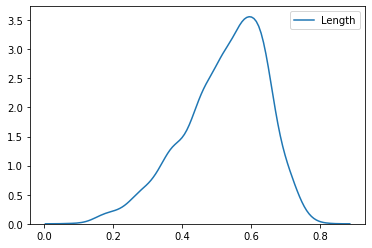

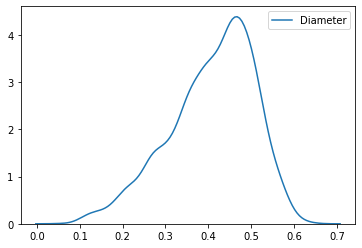

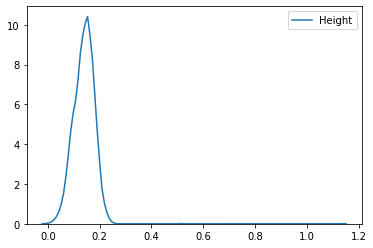

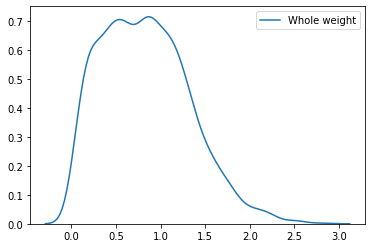

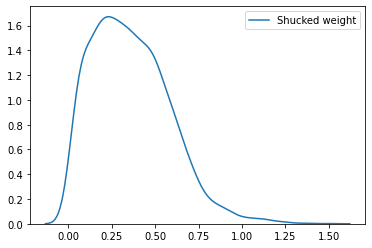

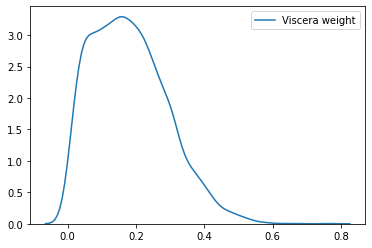

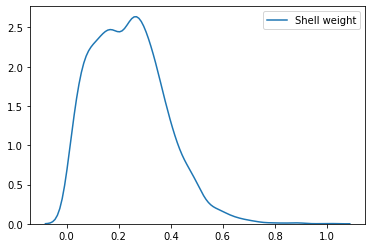

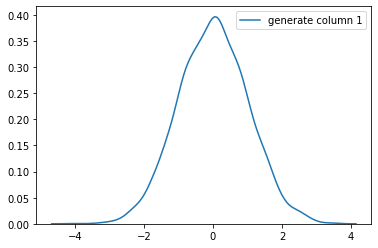

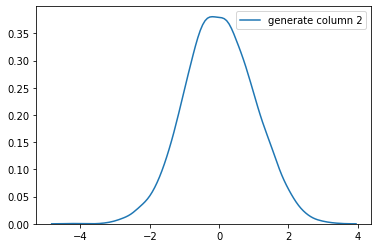

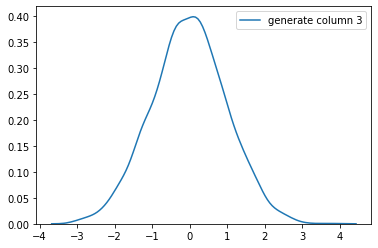

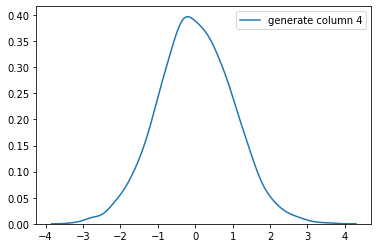

In [16]:
for col in dataset.columns:
    if dataset[col].dtypes =='float64'or dataset[col].dtypes =='int64':
        plt.figure()
        sns.kdeplot(dataset[col])

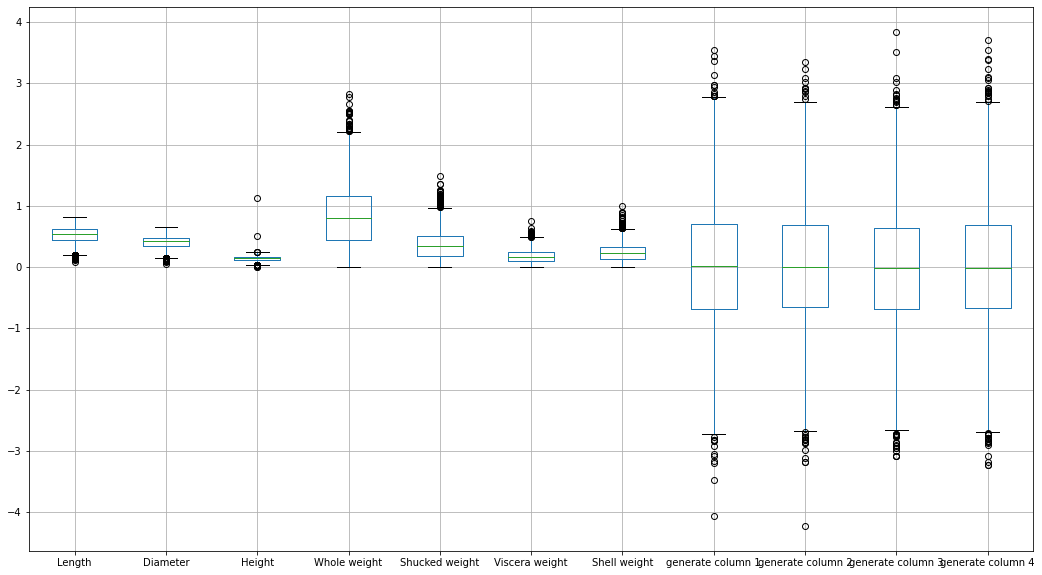

In [17]:
boxplot = dataset.boxplot(list(dataset.columns),figsize = (18,10))

In [18]:
# ## usando QQPLOT
# ## Infelizmente se comporta como mais uma ferramenta gráfica, pois o único parâmetro retornado é uma figura...

# from statsmodels.graphics.gofplots import qqplot


# for col in dataset.columns:
#     qqplot(z_dataset[col], line='s')
#     plt.title("{}".format(col))
#     plt.show()

----------------------

### Teste de  Kolmogorov-Smirnov
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest

In [19]:
### Ideia para usar o Terste de kolmogorov smirnov

Que eu saiba, não existe uma maneira automática de obter o tipo de distribuição e os parâmetros de uma amostra (pois inferir que a distribuição de uma amostra é um problema estatístico por si só).

Na minha opinião, o melhor que você pode fazer é:

(para cada atributo)

Tente ajustar cada atributo a uma lista razoavelmente grande de possíveis distribuições (por exemplo, consulte Ajustando a distribuição empírica às teóricas com Scipy (Python)? Para obter um exemplo com Scipy)

Avalie todos os seus ajustes e escolha o melhor. Isso pode ser feito executando um teste de Kolmogorov-Smirnov entre sua amostra e cada uma das distribuições do ajuste (você tem uma implementação no Scipy, novamente) e escolhendo aquele que minimiza D, a estatística de teste (também conhecida como diferença entre os amostra e o ajuste).

Bônus: faria sentido - pois você criará um modelo para cada uma das variáveis ​​e escolherá um ajuste para cada uma - embora a qualidade de sua previsão dependa da qualidade de seus dados e das distribuições usadas para apropriado. Você está construindo um modelo, afinal.

#["norm","gamma","expon","uniform","logistic", "invgauss" ,"chi2", "burr", "beta", "alpha","exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
  

link: https://stackoverflow.com/questions/37487830/how-to-find-probability-distribution-and-parameters-for-real-data-python-3

In [20]:
def get_best_distribution(data):
    dist_names = ["alpha", "anglit", "arcsine", "argus", "beta", "betaprime", "bradford", "burr", "burr12", 
                  "cauchy", "chi","chi2","cosine","crystalball", "dgamma", "dweibull", "erlang", "expon", 
                  "exponnorm","exponweib", "exponpow", "f", "fatiguelife", "fisk", "foldcauchy", "foldnorm", 
                  "frechet_r", "frechet_l", "genlogistic", "gennorm", "genpareto", "genexpon", "genextreme",
                  "gausshyper", "gamma", "gengamma", "genhalflogistic", "gilbrat", "gompertz", 
                  "gumbel_r", "gumbel_l", "halfcauchy", "halflogistic", "halfnorm", "halfgennorm", "hypsecant", 
                  "invgamma", "invweibull", "johnsonsb", "johnsonsu", "kappa4", "kappa3", "ksone", 
                  "kstwobign", "laplace", "levy", "levy_l", "logistic", "loggamma", "loglaplace",
                  "lognorm", "loguniform", "lomax", "maxwell", "mielke", "moyal", "nakagami", "ncx2","ncf",
                  "norm", "pareto", "pearson3", "powerlaw", "powerlognorm", "powernorm","rdist", 
                  "rayleigh", "rice", "semicircular", "skewnorm", "t", "trapz", "triang",
                  "truncexpon", "uniform", "vonmises", "vonmises_line", "wald", "weibull_min",
                  "weibull_max", "wrapcauchy"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
#         print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

Lista de todas as distribuições contínuas do scipy: https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous.html<br>
P-valeu: https://en.wikipedia.org/wiki/P-value

In [ ]:
for col in dataset.columns:
    print("-------------- {} -------------".format(col))
    get_best_distribution(dataset[col])
    print("----------------------------------")

-------------- Length -------------
Best fitting distribution: skewnorm
Best p value: 0.08967356470909324
Parameters for the best fit: (-3.6341758936423374, 0.6694949439652567, 0.18865269758422964)
----------------------------------
-------------- Diameter -------------
Best fitting distribution: burr
Best p value: 0.09262049180006258
Parameters for the best fit: (21.40433910878557, 0.13961365622607871, 0.041950596311078364, 0.48236049600533665)
----------------------------------
-------------- Height -------------
Best fitting distribution: burr
Best p value: 1.704759330190796e-05
Parameters for the best fit: (12.860310742015425, 0.26797292652866617, -0.007052355768943315, 0.18223001006934036)
----------------------------------
-------------- Whole weight -------------
Best fitting distribution: mielke
Best p value: 0.3599775421450794
Parameters for the best fit: (1.1945755620489997, 6.734769753416561, 0.001847626868732472, 1.423543237171593)
----------------------------------
-------

Distribuição mais encontrada: burr https://en.wikipedia.org/wiki/Burr_distribution
tentar entende-la depois

---------------------------------------

### Seção reservada ao Anderson-Darling test, Shapiro-Wilk Test, D'Agostino's K^2 test

https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/<br>
https://medium.com/@rrfd/testing-for-normality-applications-with-python-6bf06ed646a9<br>
http://www.portalaction.com.br/inferencia/testes-de-normalidade<br>
https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

### Anderson test
O Anderson-Darling testa a hipótese nula de que uma amostra é retirada de uma população que segue uma distribuição específica.Porém só funciona para normal, exponencial, logística e Gumbel.<br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html#scipy.stats.anderson

In [22]:
import scipy.stats as st
def anderson_test(data):
    result = st.anderson(data)
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

In [23]:
for col in dataset.columns:
    print("-------------- {} -------------".format(col))
    anderson_test(dataset[col])
    print("----------------------------------")

-------------- Length -------------
Statistic: 36.621
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)
----------------------------------
-------------- Diameter -------------
Statistic: 36.438
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)
----------------------------------
-------------- Height -------------
Statistic: 14.493
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look

------------------------------------------------------------

### Shapiro-Wilk test

funciona somente para distribuição normal, segundo a definição.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [24]:
import scipy.stats as st
def shapiro_test(data):
    D,p = st.shapiro(data)
    alpha = 0.05
    
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
    
    return p

In [25]:
for col in dataset.columns:
    print("-------------- {} -------------".format(col))
    shapiro_test(dataset[col])
    print("----------------------------------")

-------------- Length -------------
Sample does not look Gaussian (reject H0)
----------------------------------
-------------- Diameter -------------
Sample does not look Gaussian (reject H0)
----------------------------------
-------------- Height -------------
Sample does not look Gaussian (reject H0)
----------------------------------
-------------- Whole weight -------------
Sample does not look Gaussian (reject H0)
----------------------------------
-------------- Shucked weight -------------
Sample does not look Gaussian (reject H0)
----------------------------------
-------------- Viscera weight -------------
Sample does not look Gaussian (reject H0)
----------------------------------
-------------- Shell weight -------------
Sample does not look Gaussian (reject H0)
----------------------------------
-------------- generate_column1 -------------
Sample looks Gaussian (fail to reject H0)
----------------------------------
-------------- generate_column2 -------------
Sample loo

-------------------------------------

### Teste D'Agostino's K² ou Normaly teste

Outro teste para testar o dado referente o quanto ele se difere de uma distribuição normal.<br>
fonte: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

In [26]:
import scipy.stats as st
def normal_test(data):
    D,p = st.normaltest(data)
    alpha = 0.05
    
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
    
    return p

In [27]:
for col in dataset.columns:
    print("-------------- {} -------------".format(col))
    normal_test(dataset[col])
    print("----------------------------------")

-------------- Length -------------
Sample does not look Gaussian (reject H0)
----------------------------------
-------------- Diameter -------------
Sample does not look Gaussian (reject H0)
----------------------------------
-------------- Height -------------
Sample does not look Gaussian (reject H0)
----------------------------------
-------------- Whole weight -------------
Sample does not look Gaussian (reject H0)
----------------------------------
-------------- Shucked weight -------------
Sample does not look Gaussian (reject H0)
----------------------------------
-------------- Viscera weight -------------
Sample does not look Gaussian (reject H0)
----------------------------------
-------------- Shell weight -------------
Sample does not look Gaussian (reject H0)
----------------------------------
-------------- generate_column1 -------------
Sample looks Gaussian (fail to reject H0)
----------------------------------
-------------- generate_column2 -------------
Sample loo

## Lilliefors normatility test

Biblioteca importada de:<br>
https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.lilliefors.html


In [30]:
import statsmodels.api as sm
def lillierfos_test(data):
    D,p = sm.stats.diagnostic.lilliefors(data, dist="norm")
    alpha = 0.05
    
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
    
    return p

In [31]:
for col in dataset.columns:
    print("-------------- {} -------------".format(col))
    lillierfos_test(dataset[col])
    print("----------------------------------")

-------------- Length -------------
Sample does not look Gaussian (reject H0)
----------------------------------
-------------- Diameter -------------
Sample does not look Gaussian (reject H0)
----------------------------------
-------------- Height -------------
Sample does not look Gaussian (reject H0)
----------------------------------
-------------- Whole weight -------------
Sample does not look Gaussian (reject H0)
----------------------------------
-------------- Shucked weight -------------
Sample does not look Gaussian (reject H0)
----------------------------------
-------------- Viscera weight -------------
Sample does not look Gaussian (reject H0)
----------------------------------
-------------- Shell weight -------------
Sample does not look Gaussian (reject H0)
----------------------------------
-------------- generate_column1 -------------
Sample looks Gaussian (fail to reject H0)
----------------------------------
-------------- generate_column2 -------------
Sample loo

Possível motivo para refletir o uso desses testes, referente ao teste de hipótese para normal:<br> 
    https://stackoverflow.com/questions/7781798/seeing-if-data-is-normally-distributed-in-r/7788452#7788452

----------------------

## Cramer Von Nices
https://pypi.org/project/scikit-gof/<br>
https://www.kaggle.com/thevenkateshgandi/normality-tests/notebook

In [32]:
from skgof import cvm_test

def von_misses(data):
    p = cvm_test(data, "norm").pvalue
    alpha = 0.05
    
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
    
    return p

In [33]:
for col in dataset.columns:
    print("-------------- {} -------------".format(col))
    von_misses(dataset[col])
    print("----------------------------------")

-------------- Length -------------
Sample looks Gaussian (fail to reject H0)
----------------------------------
-------------- Diameter -------------
Sample looks Gaussian (fail to reject H0)
----------------------------------
-------------- Height -------------
Sample looks Gaussian (fail to reject H0)
----------------------------------
-------------- Whole weight -------------
Sample looks Gaussian (fail to reject H0)
----------------------------------
-------------- Shucked weight -------------
Sample looks Gaussian (fail to reject H0)
----------------------------------
-------------- Viscera weight -------------
Sample looks Gaussian (fail to reject H0)
----------------------------------
-------------- Shell weight -------------
Sample looks Gaussian (fail to reject H0)
----------------------------------
-------------- generate_column1 -------------
Sample looks Gaussian (fail to reject H0)
----------------------------------
-------------- generate_column2 -------------
Sample loo

-----------------------------------------